<H1>Introduction | Business Undertanding

<br>Road accidents are extremely common. Often times they lead to a loss of property and even life. Wouldn’t it be great to be able to understand what are the most common causes, in order to prevent them from happening? With this analysis, I am attempting to understand these factors and their correlation. This analysis has multiple applications like an app that will prompt the drivers to be more careful depending on the weather and road conditions on any given day or a way for the police to enforce more safety protocols. In this instance, I am using the data from the City of Seattle’s police department showing all the collisions from 2004 till present.

<H1> Data Understanding

<br> This is an extensive data set from the Seattle Police Department, with over 190,000 observations collected over the last 15+ years. To accurately build a model to prevent future accidents and/or reduce their severity, we will use the following attributes — ADDRTYPE, WEATHER, ROADCOND, VEHCOUNT, PERSONCOUNT.

<H3> Methodology

<br> I used Jupyter Notebooks to conduct that analysis and imported all the necessary Python libraries like Pandas, Numpy, Matplotlib, and Seaborn. The data was mostly categorical so I stuck to graphical representation to see correlation between various variables.
I started by importing the csv file and to prepare the data, I dropped the columns we do not need from the dataset, i.e., columns that do not have values or where the values are unknown. Even though this is an important factor, I dropped Speeding entirely because it is missing over 180,000 values and this can hamper the results.

In [26]:
df=pd.read_csv(r'C:\Users\Navya\Desktop\Data Science Certificates\Data-Collisions.csv')

In [28]:
df=df[['SEVERITYCODE','ROADCOND','WEATHER','LIGHTCOND','ADDRTYPE','VEHCOUNT','PERSONCOUNT','SPEEDING']]

In [29]:
df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [30]:
df.drop('SPEEDING',axis=1, inplace=True)

C:\Users\Navya\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<br>Upon further inspection, I found out that ROADCOND and WEATHER have unknown values. This will again hamper the analysis therefore I dropped the values where there is no information.

In [31]:
df.head()

,SEVERITYCODE,ROADCOND,WEATHER,LIGHTCOND,ADDRTYPE,VEHCOUNT,PERSONCOUNT
0,2,Wet,Overcast,Daylight,Intersection,2,2
1,1,Wet,Raining,Dark - Street Lights On,Block,2,2
2,1,Dry,Overcast,Daylight,Block,3,4
3,1,Dry,Clear,Daylight,Block,3,3
4,2,Wet,Raining,Daylight,Intersection,2,2


In [62]:
df=df[df['ROADCOND'] !='Unknown']
df=df[df['WEATHER'] !='Unknown']
df=df[df['ADDRTYPE'] !='Unknown']

In [65]:
df.dropna(axis=0,inplace=True)

<br>Once again I checked the data and now the data is clean and ready to be analyzed.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172081 entries, 0 to 194672
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   SEVERITYCODE  172081 non-null  int64 
 1   ROADCOND      172081 non-null  object
 2   WEATHER       172081 non-null  object
 3   LIGHTCOND     172081 non-null  object
 4   ADDRTYPE      172081 non-null  object
 5   VEHCOUNT      172081 non-null  int64 
 6   PERSONCOUNT   172081 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 10.5+ MB


The above shows us that the data is ready for use and we can begain our analysis

<H1> Results

<br>I imported matplotlib and seaborn libraries to conduct graphical analysis. First I checked the number of vehicles involved in most accidents. I found out that most accidents included 2–3 vehicles at once.

Text(0.5,1,'No of Vehicles in Accidents')

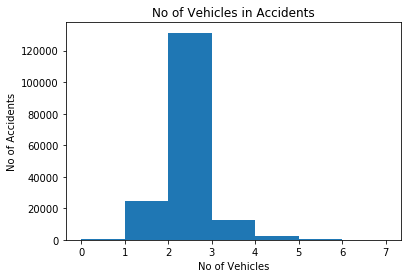

In [67]:
import matplotlib.pyplot as plt
bins=np.arange(df.PERSONCOUNT.min(),8,1)
plt.hist(df.VEHCOUNT,bins=bins)
plt.xlabel('No of Vehicles')
plt.ylabel('No of Accidents')
plt.title('No of Vehicles in Accidents')


Next I checked for the number of people involved in these accidents at any given time. Most accidents included two people (95,947). This can tell us that maybe solo drivers cause more accidents because they are speeding, or maybe they are distracted.

Text(0.5,1,'No of People in Accidents')

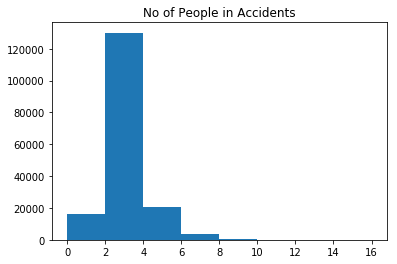

In [69]:
bins=np.arange(df.PERSONCOUNT.min(),17,2)
plt.hist(df.PERSONCOUNT,bins=bins)
plt.xlabel=('No of Persons')
plt.ylabel=('No of Accidents')
plt.title('No of People in Accidents')

<br>It is also important to find out where most accidents take place. Upon analyzing the data, it turned out that intersections are the most common accident zones. This could be because drivers don’t heed the stop sign, or maybe some intersections can use more stop signs, or maybe there need to be more pedestrian crossings. In any case, this should be an area to look into more in-depth.

Text(0.5,1,'No of Accidents in relation to the location')

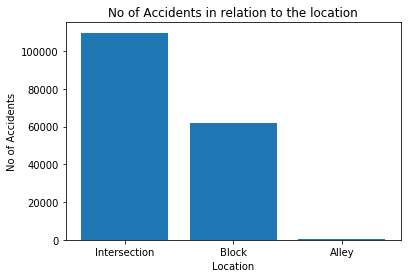

In [68]:
import matplotlib.pyplot as plt
x=df.ADDRTYPE.unique()
Data=df.ADDRTYPE.value_counts()
plt.bar(x,height=Data)
plt.xlabel('Location')
plt.ylabel('No of Accidents')
plt.title('No of Accidents in relation to the location')

Next in my analysis, I wanted to check how the weather conditions affect the accidents. To my surprise, overcast conditions cause most accidents, rather than rainy or snowy conditions.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

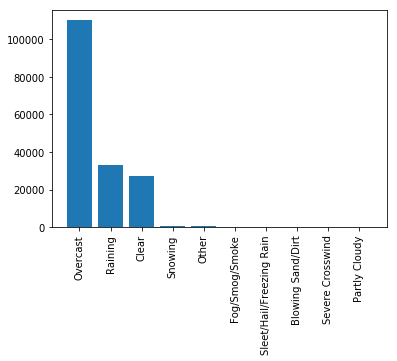

In [84]:
x=df.WEATHER.unique()
Data=df.WEATHER.value_counts()
plt.bar(x,height=Data)
plt.xlabel='Weather'
plt.ylabel='No of Accidents'
plt.title='No of Accident based on Weather'
plt.xticks(rotation=90)


Lastly, I checked for the impact of road conditions on accidents. As expected, wet roads cause more accidents. This is also somewhat in contrast with our previous findings and could be looked into more.

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

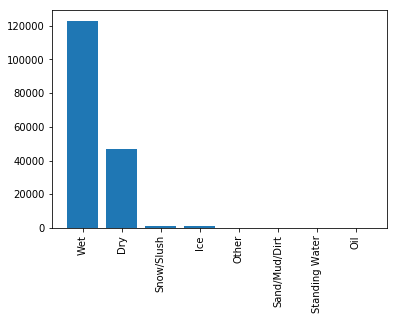

In [83]:
x=df.ROADCOND.unique()
data=df.ROADCOND.value_counts()
plt.bar(x,height=data)
plt.xlabel='Road Condition'
plt.ylabel='No of Accidents'
plt.title='No of Accidents based on Road conditions'
plt.xticks(rotation=90)

Next, I moved on to understand the severity of accidents based on our chose variables. I noticed the severity of accidents is higher (level 2 — injury) on an intersection whereas most non-severe accidents (level 1 — property damage) occur on blocks. I also found that most severe accidents occur at intersections and involve 2–3 people.

![title](Final_Image.png)

<H1> Discussion

At the start of our analysis, I was trying to figure out the severity and frequency of road accidents based on weather conditions, road conditions, and other factors. Even though our data was a good size, there were a number of missing elements and we needed to clean the data in order to get a good result. We had to drop ‘SPEED’ because there were too many missing elements but I think that is an important factor that should be considered. From the analysis, it is clear that most accidents involve solo drivers, on wet roads, bad weather, at intersections, and are minor in nature. This could be helpful to the police department in understanding where to install more stop signs, or maybe adding cameras to intersections to compel people to slow down. We also live in a technologically friendly world so maybe we can develop some inbuilt technology in our cars that warn us when the road and weather conditions are bad, or the car is approaching a stop sign.

<h1>Conclusion

Although this analysis has given us some good insight, there needs to be a closer inspection of certain other variables. It seems like a lot of these accidents are minor and avoidable. Having said that there is still a considerable amount of loss of property and these findings can be helpful to the Seattle PD in enforcing some new measures to prevent future accidents.